Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from pprint import pprint
import covsirphy as cs
import seaborn as sns
sns.set()
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import matplotlib.dates as mdates
import pickle
import numpy as np
from itertools import cycle

%matplotlib inline

rcParams['figure.figsize'] = 8.5, 5
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.style.use('seaborn')

cs.__version__

'2.15.0'

In [2]:
import covsirphy as cs

# Download datasets
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu(verbose=False)
population_data = data_loader.population(verbose=False)

# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [3]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)

In [4]:
countries = ["Italy", "Netherlands", "Sweden", "Germany", "United Kingdom", "China", "India", "Japan", "United States", "Australia"]
countries = ["United Kingdom"]

analyser.countries = countries
len(analyser.countries)

1

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [5]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{15: ['United Kingdom']}


In [6]:
# Set phases with S-R trend analysis
analyser.trend()
# The number of countries
len(analyser.countries)
analyser.countries

['United Kingdom']

In [7]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{15: ['United Kingdom']}


In [8]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [9]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=20)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	GBR,  5th phase (31Oct2020 - 11Nov2020): finished  158 trials in 0 min 20 sec
	GBR,  7th phase (25Nov2020 - 10Dec2020): finished  152 trials in 0 min 20 sec
	GBR, 12th phase (14Jan2021 - 22Jan2021): finished  150 trials in 0 min 20 sec
	GBR,  2nd phase (03Sep2020 - 04Oct2020): finished  141 trials in 0 min 20 sec
	GBR,  1st phase (02May2020 - 02Sep2020): finished  183 trials in 0 min 20 sec
	GBR, 11th phase (07Jan2021 - 13Jan2021): finished  202 trials in 0 min 20 sec
	GBR,  8th phase (11Dec2020 - 21Dec2020): finished  194 trials in 0 min 20 sec
	GBR,  4th phase (20Oct2020 - 30Oct2020): finished  189 trials in 0 min 20 sec
	GBR, 10th phase (31Dec2020 - 06Jan2021): finished  179 trials in 0 min 20 sec
	GBR, 13th phase (23Jan2021 - 04Feb2021): finished  174 trials in 0 min 20 sec
	GBR, 14th phase (05Feb2021 - 27Feb2021): finished  166 trials in 0 min 20 sec
	GBR,  9th phase (22Dec2020 - 30Dec2020): finished  168 tr

In [10]:
df = analyser.track()
df.to_pickle("df_United_Kingdom")

In [48]:
df

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-19,Australia,0.000888,0.000071,0.046993,0.002964,0.001,3514,5,84,...,2,2,0,0,2,3,2,1,2,44.44
1,2020-03-19,Australia,0.000888,0.000071,0.046993,0.002964,0.001,3514,5,84,...,2,2,0,0,0,3,2,1,2,44.44
2,2020-03-19,Australia,0.000888,0.000071,0.046993,0.002964,0.001,3514,5,84,...,2,2,0,0,0,3,2,1,2,44.44
3,2020-03-19,Australia,0.000888,0.000071,0.046993,0.002964,0.001,3514,5,84,...,2,2,0,0,0,3,2,1,2,44.44
4,2020-03-19,Australia,0.000888,0.000071,0.046993,0.002964,0.001,3514,5,84,...,2,2,0,0,0,3,2,1,2,44.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63849,2021-02-27,Netherlands,0.000120,0.000232,0.014429,0.018716,0.000,1077.0,17.0,13.0,...,2,4,1,2,1,3,2,2,1,78.70
63850,2021-02-27,Netherlands,0.000120,0.000232,0.014429,0.018716,0.000,1077.0,17.0,13.0,...,2,4,1,2,1,3,2,2,1,78.70
63851,2021-02-27,Netherlands,0.000120,0.000232,0.014429,0.018716,0.000,1077.0,17.0,13.0,...,2,4,1,2,1,3,2,2,1,78.70
63852,2021-02-27,Netherlands,0.000120,0.000232,0.014429,0.018716,0.000,1077.0,17.0,13.0,...,2,4,1,2,1,3,2,2,1,78.70


### $Rt$: Reprodcution number $\mathrm{[-]}$

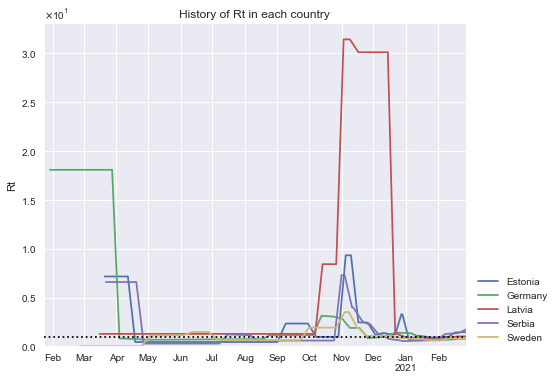

In [27]:
analyser.history("Rt", roll_window=7);

### $\rho$: Effective contact rate $\mathrm{[-]}$

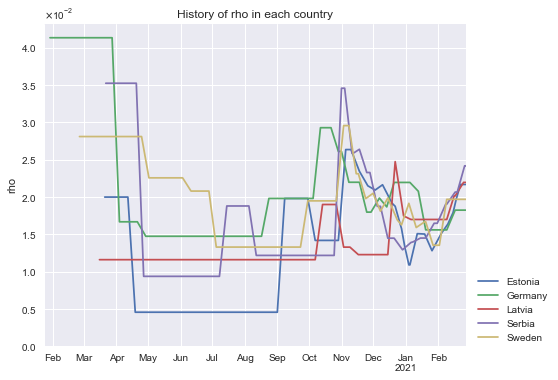

In [28]:
analyser.history("rho", roll_window=7);

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


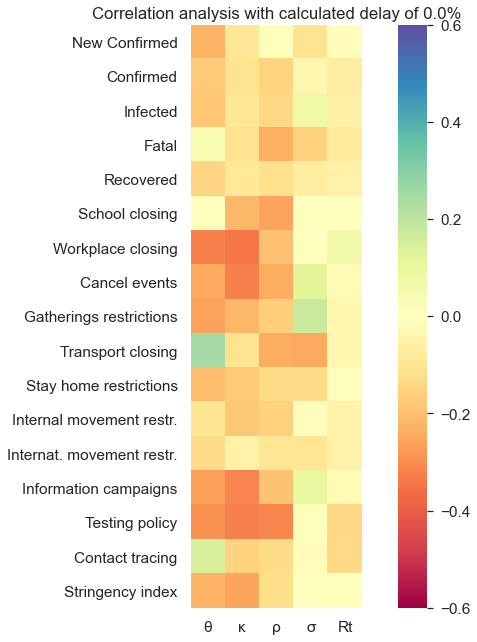

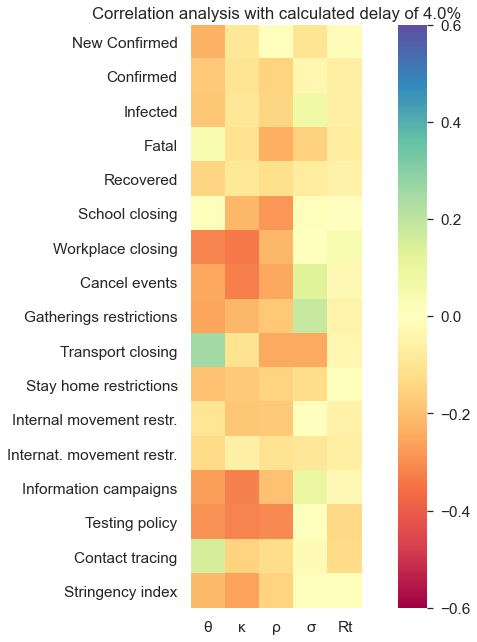

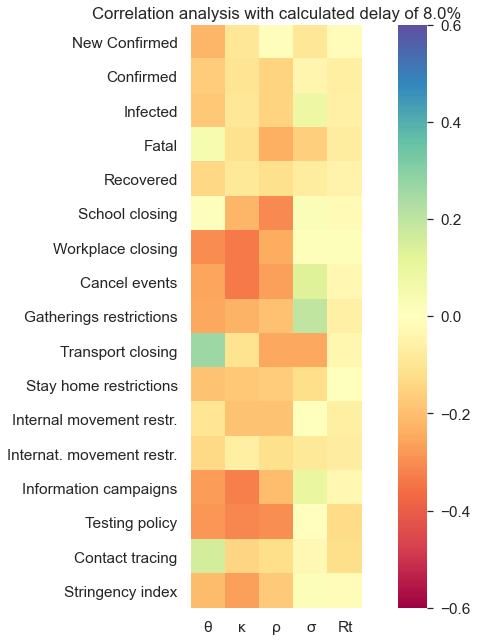

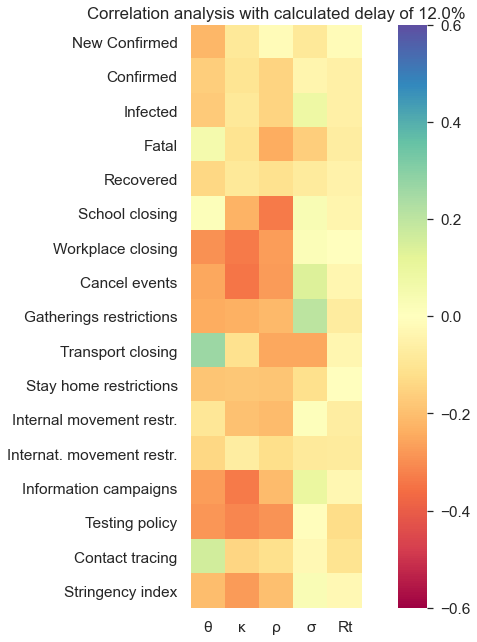

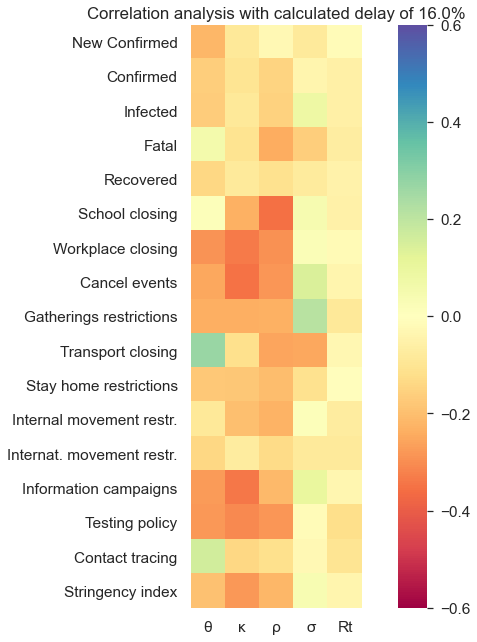

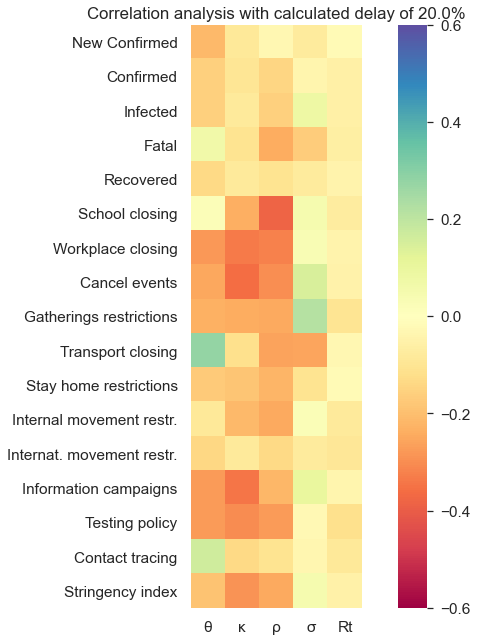

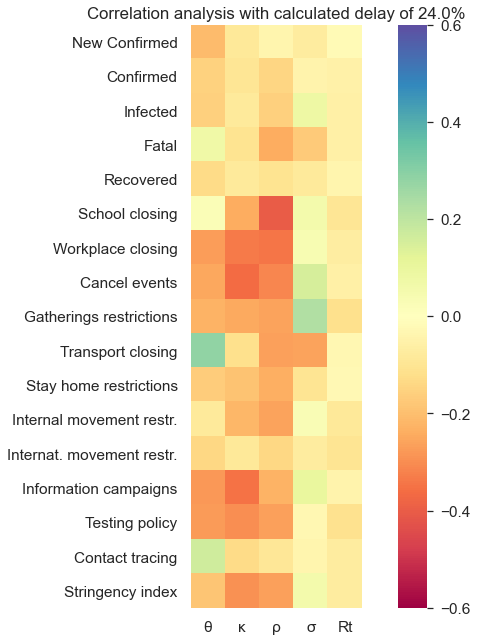

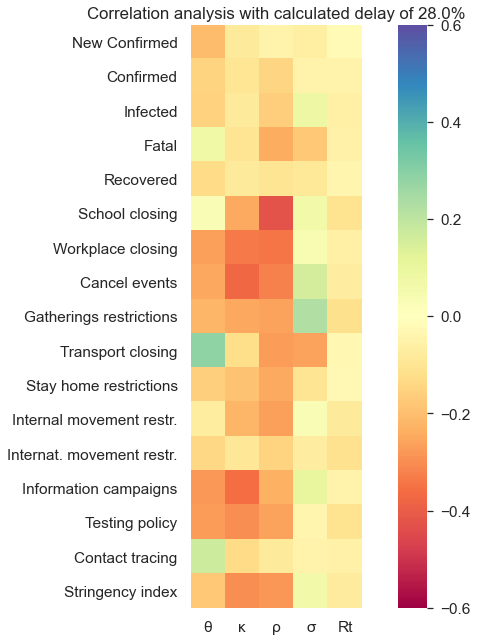

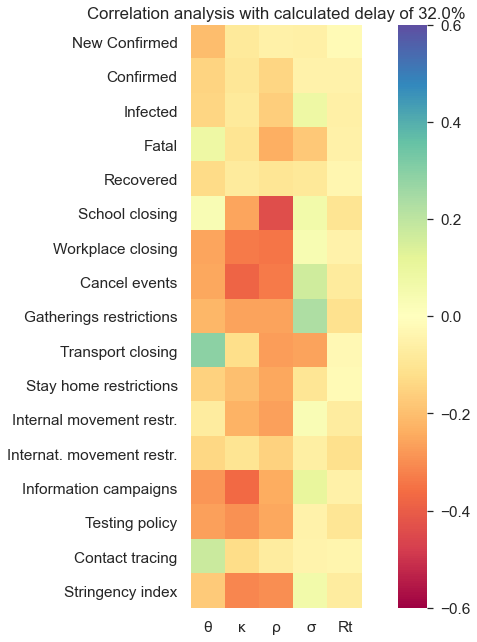

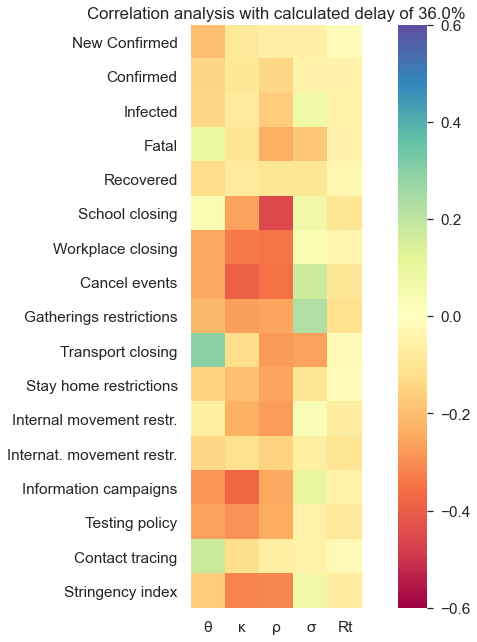

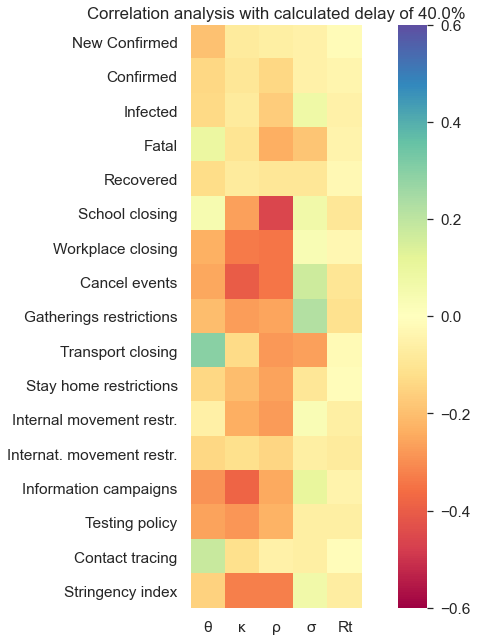

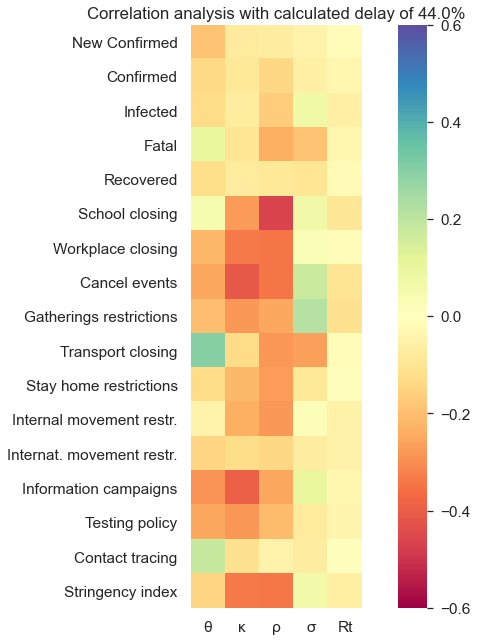

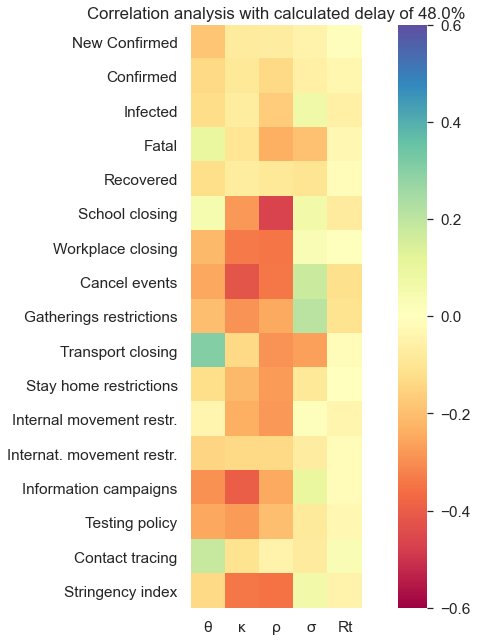

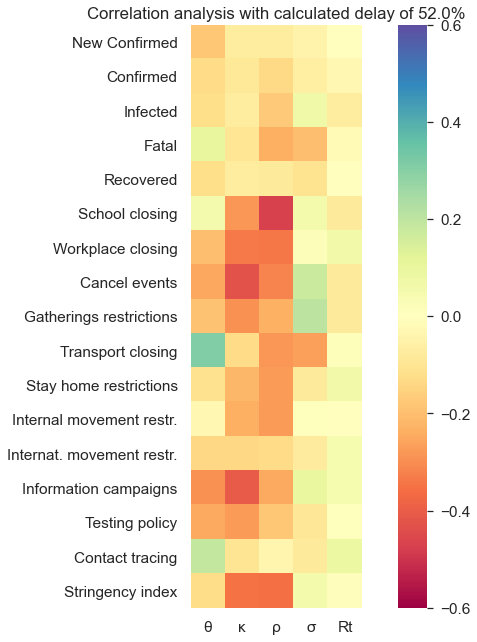

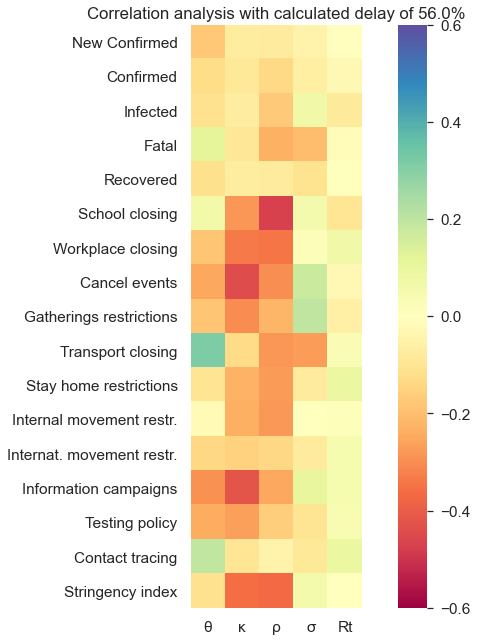

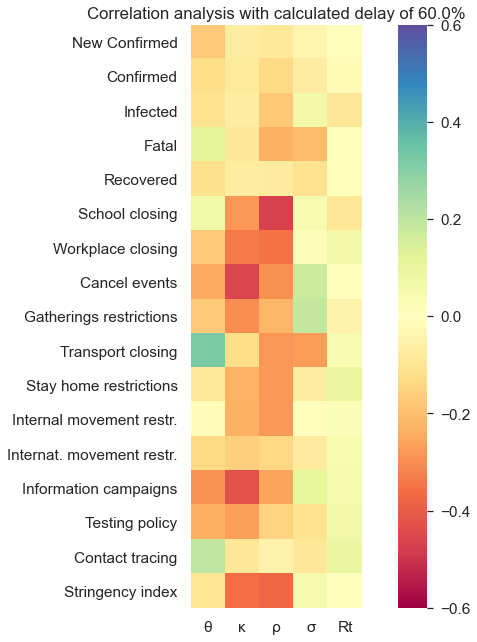

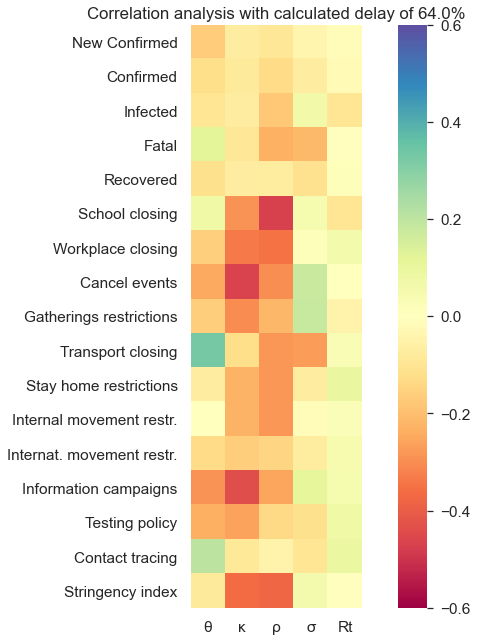

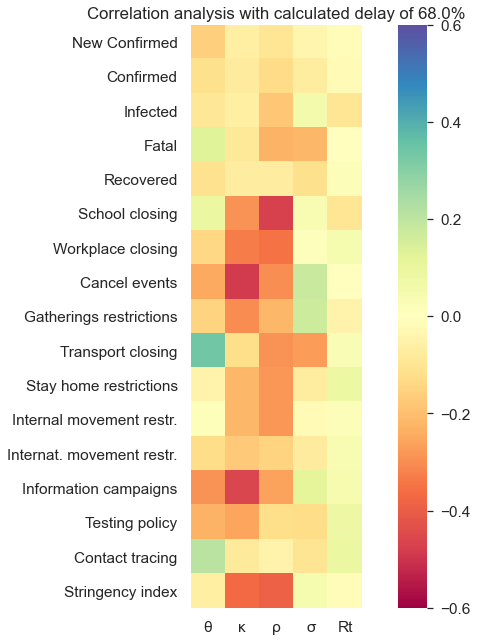

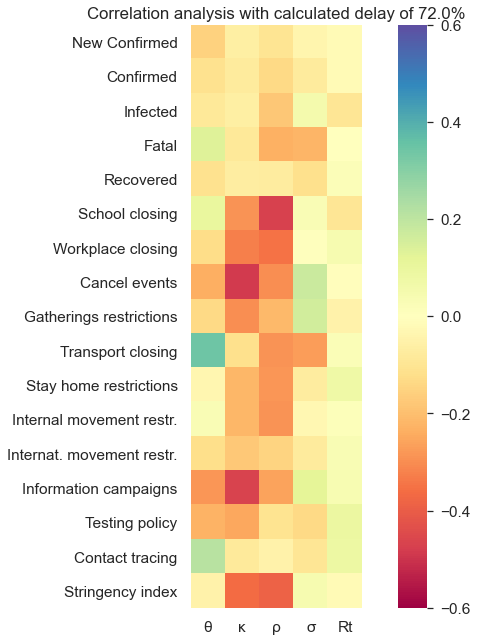

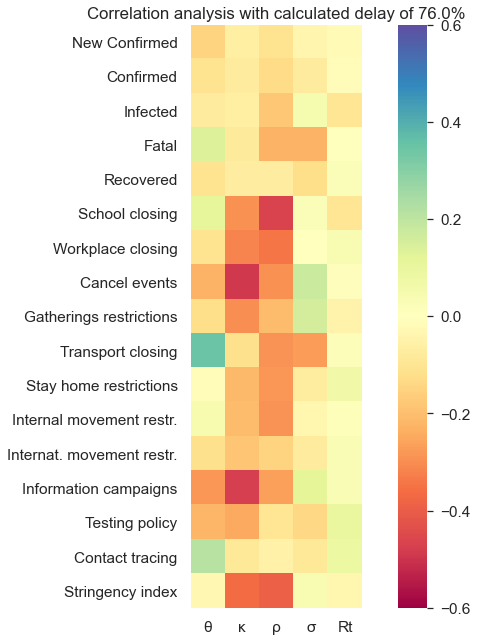

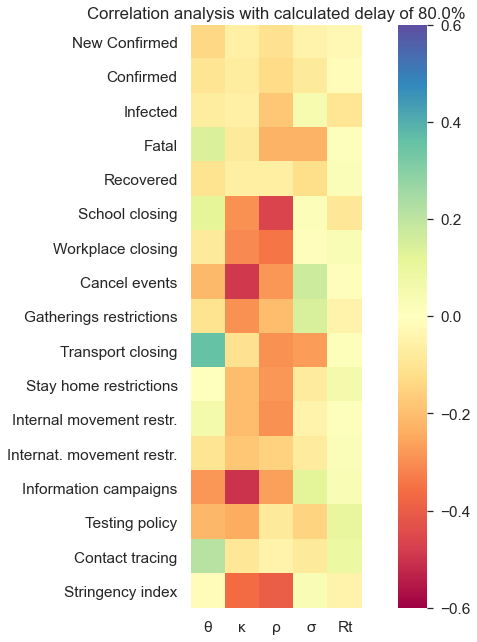

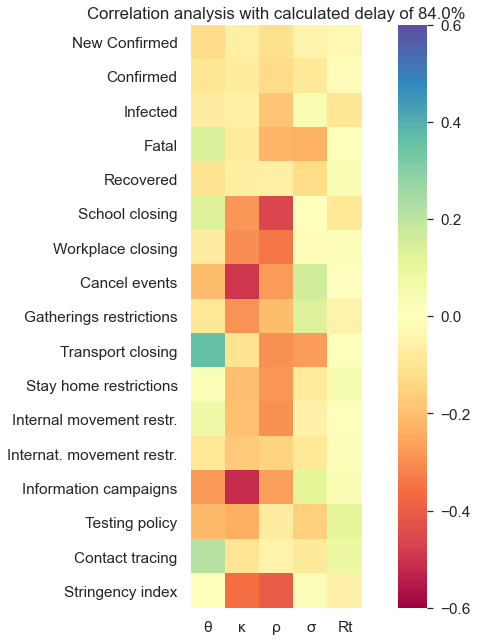

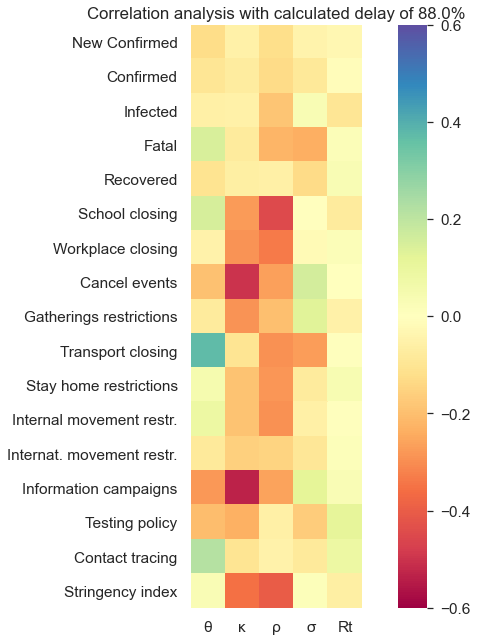

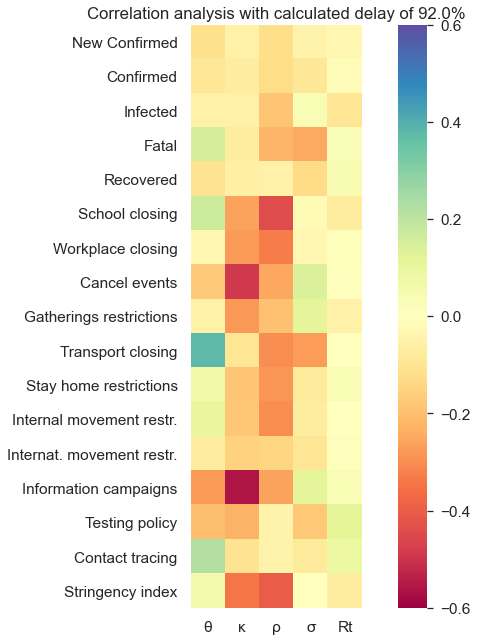

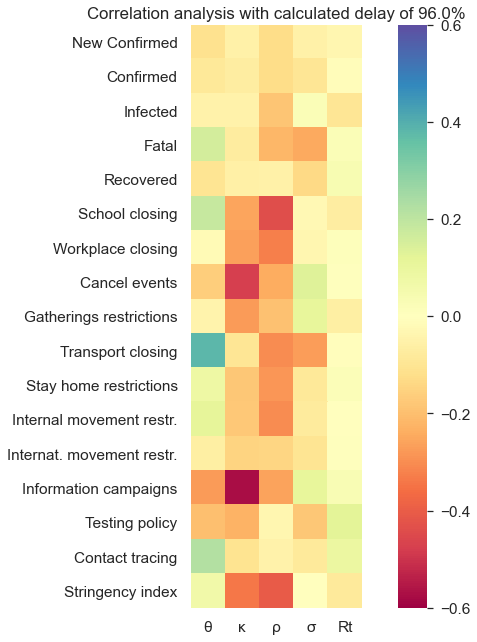

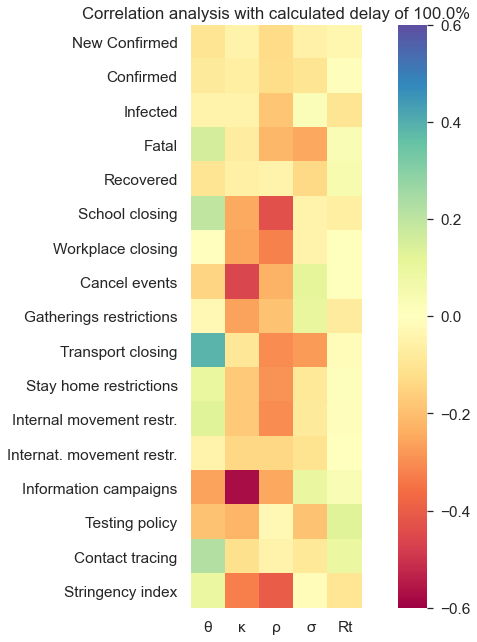

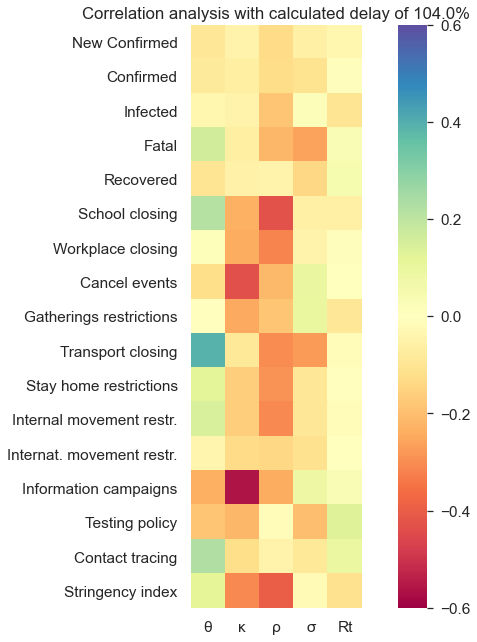

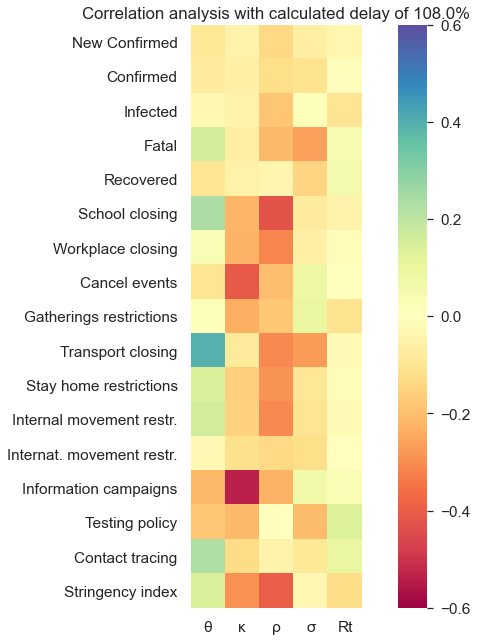

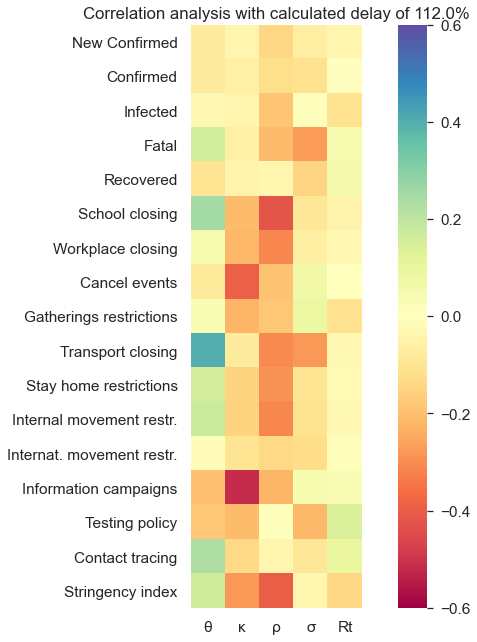

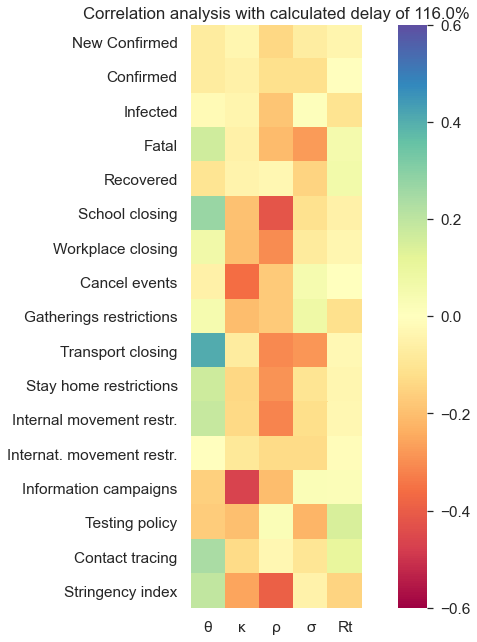

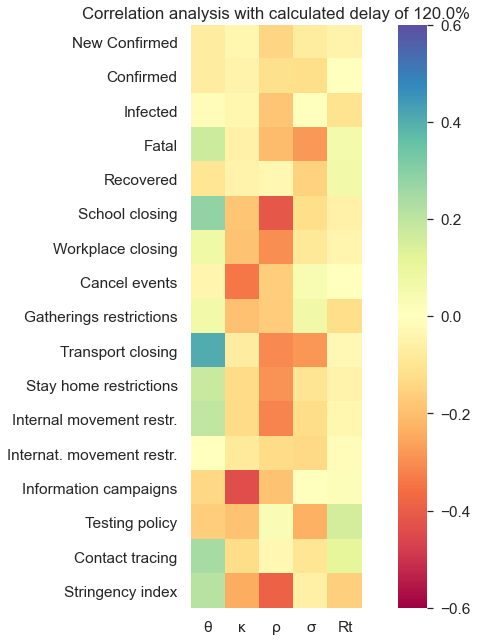

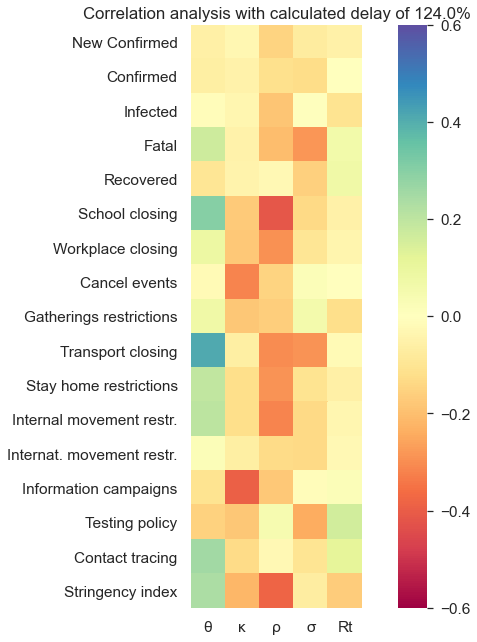

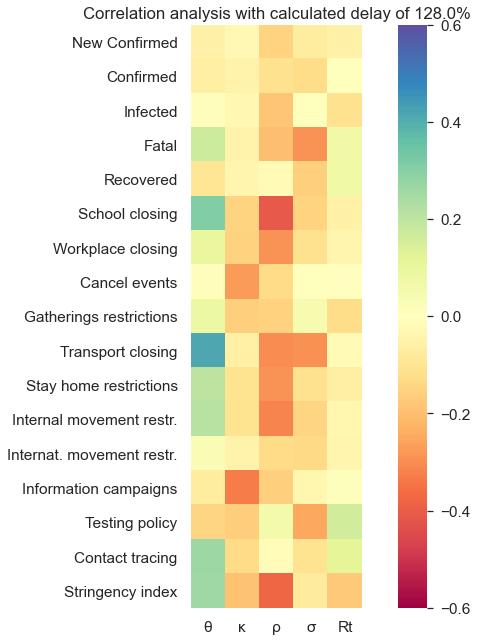

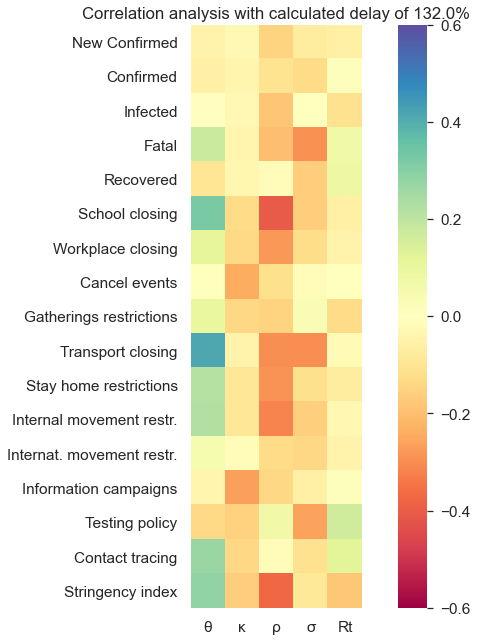

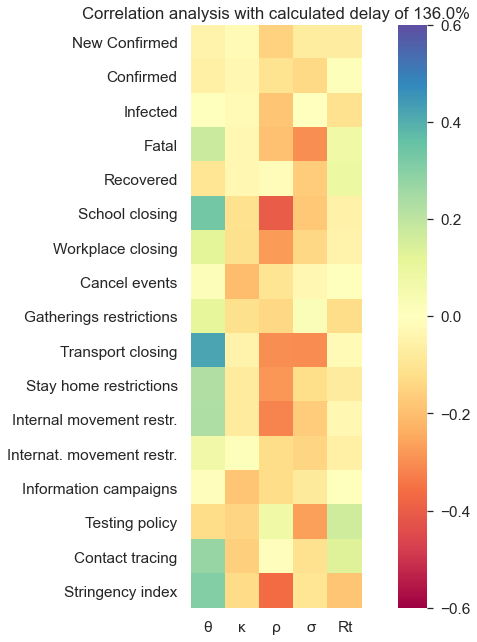

In [119]:
ITER = 35
MAX = 25
for j in range(ITER):

    df = pickle.load( open( "Correlation", "rb" ) )

    sirf_cols = ['theta', 'kappa', 'rho', 'sigma', 'alpha1 [-]',
           '1/alpha2 [day]', '1/beta [day]', '1/gamma [day]', 'Rt']
    param_cols = sirf_cols
    oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
    cols = param_cols + oxcgrt_cols
    df[param_cols] = df[param_cols].astype(float)
    df = df.groupby(["Country", "Date"]).mean().reset_index()


    delays = {
        "Finland": 16,
        "Germany": 21,
        "Italy": 22,
        "Portugal": 21,
        'Serbia': 12,
        'Slovenia': 26,
        'Sweden': 22,
        'Switzerland': 24
    }

    df[param_cols] = df.groupby("Country").apply(lambda x: (x[param_cols].shift(
        int(delays[x["Country"].values[0]] * -3 * ((j + 1)/(ITER + 1)) ) )))

    df = df.loc[:, ["Date", "Country", *cols]]

    track_df = df.copy()
    
    countries = df["Country"].unique()
    total = jhu_data.cleaned()
    total = total[total["Province"] == "-"]
    merged = pd.merge(total, track_df, on=["Country", "Date"], how="inner")
    new_confirmed = merged.groupby("Country")["Confirmed"].diff()
    merged.insert(0,'New Confirmed', new_confirmed)
    
    track_df = merged.drop(["Date", "Country", "Province"], axis=1)
    track_df = track_df.astype(float)
    corr_df = track_df.corr()
    corr_df = corr_df.rename(columns={"theta": "θ", "kappa": "κ", "rho": "ρ", "sigma": "σ"})


    corr = corr_df.copy()
    y_cols = ['New Confirmed', 'Confirmed', 'Infected', 'Fatal', 'Recovered','alpha1 [-]', '1/alpha2 [day]', '1/beta [day]',
           '1/gamma [day]', 'School_closing', 'Workplace_closing',
           'Cancel_events', 'Gatherings_restrictions', 'Transport_closing',
           'Stay_home_restrictions', 'Internal_movement_restrictions',
           'International_movement_restrictions', 'Information_campaigns',
           'Testing_policy', 'Contact_tracing', 'Stringency_index']
    x_cols = ['θ', 'κ', 'ρ', 'σ', 'Rt', 'alpha1 [-]', '1/alpha2 [day]', '1/beta [day]', '1/gamma [day]',]
    x = ['θ', 'κ', 'ρ', 'σ', 'Rt']
    corr_df_selection = corr.drop(y_cols, axis=0)
    corr_df_selection = corr_df_selection.drop(x_cols, axis=1)
    corr_df_selection

    cols = corr_df_selection.columns
    new_cols = []
    for i in cols:
        if i == "International_movement_restrictions":
            new_cols.append("Internat. movement restr.")
        elif i == "Internal_movement_restrictions":
            new_cols.append("Internal movement restr.")
        else:
            new_cols.append(i.replace("_", " "))
    corr_df_selection.columns = new_cols
    corr_df_selection = corr_df_selection.transpose()

    plt.figure(figsize = (11.5,10));
    sns.set(font_scale=1.4);
    g = sns.heatmap(corr_df_selection, 
                xticklabels=x,
                yticklabels=corr_df_selection.index.values, vmin=-0.6, vmax=0.6,
                   cmap='Spectral');
    g.set_aspect("equal");
    g.set_title("Correlation analysis with calculated delay of "+ str(round((j / MAX) * 100, 1)) + "%");
    plt.savefig("delays/corr_delay_" + str(j + 10), bbox_inches="tight");


    

In [121]:
import glob
from PIL import Image
import re


# filepaths
fp_in = "delays/corr_delay_*.png"
fp_out = "delays/corrs3.gif"


# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=300, loop=10)

In [113]:
 plt.savefig("delays/corr_delay_" + str(j + 10), bbox_inches="tight")

<Figure size 576x396 with 0 Axes>

In [80]:
countries = df["Country"].unique()
track_df = df.copy()
total = jhu_data.cleaned()
total = total[total["Province"] == "-"]
merged = pd.merge(total, track_df, on=["Country", "Date"], how="inner")
new_confirmed = merged.groupby("Country")["Confirmed"].diff()
merged.insert(0,'New Confirmed', new_confirmed)

Index(['New Confirmed', 'Confirmed', 'Infected', 'Fatal', 'Recovered',
       'School closing', 'Workplace closing', 'Cancel events',
       'Gatherings restrictions', 'Transport closing',
       'Stay home restrictions', 'Internal movement restr.',
       'Internat. movement restr.', 'Information campaigns', 'Testing policy',
       'Contact tracing', 'Stringency index'],
      dtype='object')


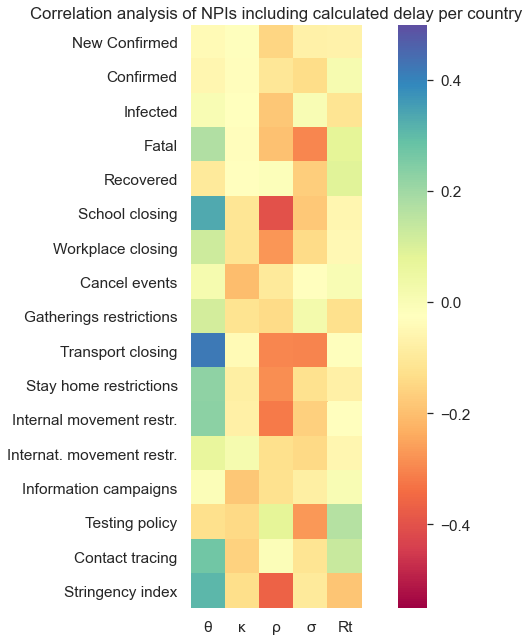

In [117]:
track_df = merged.drop(["Date", "Country", "Province"], axis=1)
track_df = track_df.astype(float)
corr_df = track_df.corr()
corr_df = corr_df.rename(columns={"theta": "θ", "kappa": "κ", "rho": "ρ", "sigma": "σ"})


corr = corr_df.copy()
y_cols = ['New Confirmed', 'Confirmed', 'Infected', 'Fatal', 'Recovered','alpha1 [-]', '1/alpha2 [day]', '1/beta [day]',
       '1/gamma [day]', 'School_closing', 'Workplace_closing',
       'Cancel_events', 'Gatherings_restrictions', 'Transport_closing',
       'Stay_home_restrictions', 'Internal_movement_restrictions',
       'International_movement_restrictions', 'Information_campaigns',
       'Testing_policy', 'Contact_tracing', 'Stringency_index']
x_cols = ['θ', 'κ', 'ρ', 'σ', 'Rt', 'alpha1 [-]', '1/alpha2 [day]', '1/beta [day]', '1/gamma [day]',]
x = ['θ', 'κ', 'ρ', 'σ', 'Rt']
corr_df_selection = corr.drop(y_cols, axis=0)
corr_df_selection = corr_df_selection.drop(x_cols, axis=1)
corr_df_selection

cols = corr_df_selection.columns
new_cols = []
for i in cols:
    if i == "International_movement_restrictions":
        new_cols.append("Internat. movement restr.")
    elif i == "Internal_movement_restrictions":
        new_cols.append("Internal movement restr.")
    else:
        new_cols.append(i.replace("_", " "))
corr_df_selection.columns = new_cols

print(corr_df_selection.columns)
corr_df_selection = corr_df_selection.transpose()

# corr_df.to_pickle("Correlation3")
plt.figure(figsize = (11.5,10))
sns.set(font_scale=1.4)
g = sns.heatmap(corr_df_selection, 
            xticklabels=x,
            yticklabels=corr_df_selection.index.values, vmin=-0.55, vmax=0.5,
               cmap='Spectral')
g.set_aspect("equal")
g.set_title("Correlation analysis of NPIs including calculated delay per country")
# g.set_xticklabels(g.get_xticklabels(), rotation = 45)
plt.savefig("Correlation_diagram_with_delay", bbox_inches="tight")



In [51]:
corr_df_selection

,theta,kappa,rho,sigma,Rt
New Confirmed,-0.113891,-0.052975,-0.121796,-0.049375,-0.032279
Confirmed,-0.090265,-0.068308,-0.125590,-0.093299,-0.011167
Infected,-0.052255,-0.052128,-0.184518,0.032179,-0.097291
Fatal,0.152616,-0.073352,-0.220347,-0.244751,0.024094
Recovered,-0.103166,-0.059454,-0.054166,-0.130578,0.038054
School closing,0.172655,-0.261880,-0.441148,-0.019549,-0.071379
Workplace closing,-0.028380,-0.273501,-0.328580,-0.029916,0.016176
Cancel events,-0.173426,-0.490220,-0.250776,0.141021,0.006660
Gatherings restrictions,-0.054707,-0.280094,-0.194270,0.116013,-0.054440
Transport closing,0.377465,-0.098137,-0.296838,-0.271762,0.001623


In [39]:
corr_df_selection.style.background_gradient(axis=None)

,New Confirmed,Confirmed,Infected,Fatal,Recovered,Rt,School closing,Workplace closing,Cancel events,Gatherings restrictions,Transport closing,Stay home restrictions,Internal movement restr.,Internat. movement restr.,Information campaigns,Testing policy,Contact tracing,Stringency index
theta,-0.054771,-0.143906,-0.142681,0.165444,-0.133526,-0.113153,0.122033,-0.199916,-0.213514,-0.234814,0.467723,-0.181708,0.130280,-0.371907,-0.209202,-0.311352,0.137693,-0.188807
kappa,-0.017721,-0.095050,-0.074793,-0.110161,-0.085739,-0.047627,-0.149306,-0.253631,-0.211946,-0.150709,-0.054966,-0.176379,-0.209582,-0.196266,-0.235534,-0.242874,-0.052738,-0.187331
rho,0.012424,-0.173730,-0.158921,-0.286042,-0.144425,0.650489,-0.308475,-0.234956,-0.281493,-0.221609,-0.301175,-0.212828,-0.335288,-0.190263,-0.161059,-0.235842,-0.197714,-0.127467
sigma,-0.010588,-0.085608,-0.083986,-0.207541,-0.066006,-0.354243,-0.053868,-0.057458,0.090043,0.164326,-0.272450,-0.139486,-0.177261,0.176900,0.056115,0.151450,-0.116878,-0.031971


In [184]:
import scipy.stats

new_df = track_df.dropna()
print(scipy.stats.pearsonr(new_df["Rt"], new_df["Stringency_index"]))
print(scipy.stats.pearsonr(new_df["theta"], new_df["Stringency_index"]))
print(scipy.stats.pearsonr(new_df["rho"], new_df["Stringency_index"]))
print(scipy.stats.pearsonr(new_df["sigma"], new_df["Stringency_index"]))
print(scipy.stats.pearsonr(new_df["kappa"], new_df["Stringency_index"]))

(-0.07807569579146513, 0.00012387135645168488)
(0.06264174512775937, 0.0020846700275391422)
(-0.4030102330364548, 7.12945060319727e-95)
(-0.0022824047986518604, 0.9107950439194755)
(-0.33814065592788184, 1.3731159864702646e-65)


In [22]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.112190,-0.046523,0.649948,-0.351747,-0.089929,-0.036222,-0.050860,-0.091042,-0.132294,-0.143525,-0.181543,-0.185278,-0.044822,-0.243905,-0.223849,-0.069898
theta,-0.112190,1.000000,0.409733,-0.165629,-0.256146,0.124119,-0.193441,-0.212953,-0.231572,0.473472,-0.174618,0.135277,-0.373833,-0.210654,-0.309288,0.141671,-0.184188
kappa,-0.046523,0.409733,1.000000,0.186253,-0.094291,-0.152077,-0.252650,-0.217695,-0.155788,-0.055380,-0.179003,-0.216256,-0.206313,-0.241343,-0.238086,-0.046623,-0.193495
rho,0.649948,-0.165629,0.186253,1.000000,-0.169448,-0.320184,-0.249125,-0.287930,-0.231408,-0.306257,-0.227122,-0.347818,-0.197521,-0.163568,-0.227890,-0.194733,-0.142638
sigma,-0.351747,-0.256146,-0.094291,-0.169448,1.000000,-0.048472,-0.052968,0.093660,0.169603,-0.272514,-0.135548,-0.174121,0.181661,0.056869,0.144326,-0.120215,-0.024997
School_closing,-0.089929,0.124119,-0.152077,-0.320184,-0.048472,1.000000,0.369339,0.491117,0.119592,0.171232,0.336138,0.411810,0.374593,0.378793,0.081733,0.214358,0.380770
Workplace_closing,-0.036222,-0.193441,-0.252650,-0.249125,-0.052968,0.369339,1.000000,0.504356,0.753787,0.230496,0.630499,0.517091,0.452462,0.390177,0.231226,0.064092,0.764884
Cancel_events,-0.050860,-0.212953,-0.217695,-0.287930,0.093660,0.491117,0.504356,1.000000,0.535711,0.198931,0.442228,0.464254,0.613032,0.771077,0.451963,0.182671,0.556933
Gatherings_restrictions,-0.091042,-0.231572,-0.155788,-0.231408,0.169603,0.119592,0.753787,0.535711,1.000000,0.138381,0.490868,0.359976,0.436608,0.397652,0.209545,-0.038743,0.762335
Transport_closing,-0.132294,0.473472,-0.055380,-0.306257,-0.272514,0.171232,0.230496,0.198931,0.138381,1.000000,0.377041,0.619902,0.009851,0.142352,0.015680,0.007961,0.334568


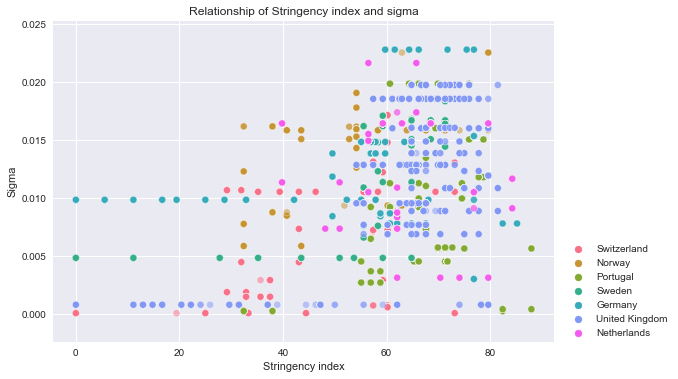

In [67]:
df_subset = track_df.copy()

# Scatter plot of Stringency index and interest 
sns.scatterplot(data=df_subset, x="Stringency_index", y="sigma", hue="Country", legend="brief", marker="o", s=50, alpha=0.5)
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and sigma")
plt.ylabel("Sigma")
plt.xlabel("Stringency index")
plt.show()

## Correlation between ODE parameters and Stringency Index with delay

In this graph, it can be seen that the correlation between Stringency Index and the ODE parameters increasing along with time, which is as expected. However, it also becomes clear that the correlation coefficiënt eventually decreases in strength after a few days. 

By shifting the timeseries data by a certain number of days, the relationship between the Stringency Index and the ODE parameters can be analyzed with a delay in time. It is expected that there is a negative correlation between the reproduction number and stringency index and that this correlation gets stronger after 10-14 days. However, for some countries' data, Rt rises again after about 30 days. 
For example, for Romania, the correlation coefficiënt between Stringency Index and reproduction number rises again after about 33 days. 

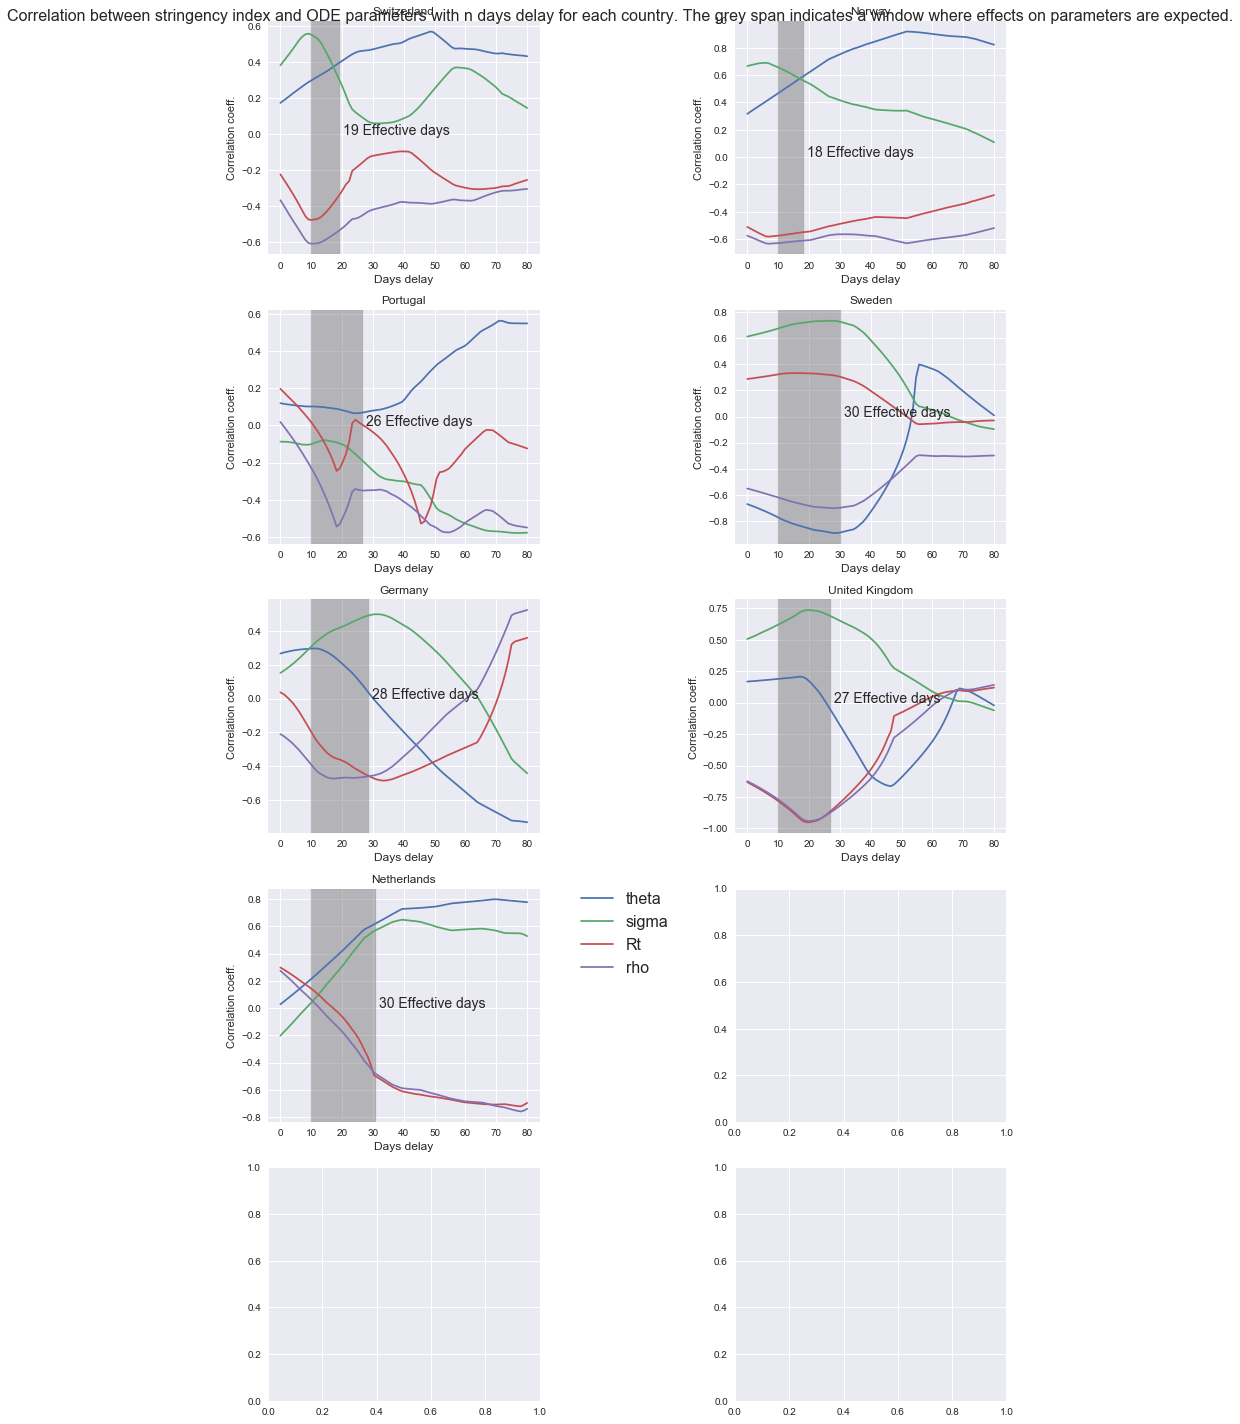

In [68]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

# Max number of days to delay effect
max_delay_days = 80
incubation_period = 10

meds = []
countries = df_subset["Country"].unique()
variables = ["theta", "sigma", "Rt", "rho"] # Excluded kappa
nrow, ncol = 5, 2
colors = map('C{}'.format, cycle(range(nrow*ncol)))
fig, axs = plt.subplots(nrow,ncol,figsize=(ncol*5.5, nrow*4), constrained_layout=True);
fig.suptitle("Correlation between stringency index and ODE parameters with n days delay for each country. \
The grey span indicates a window where effects on parameters are expected.", fontsize=16)

for country, ax in zip(countries, axs.flatten()):
    for var in variables:
        df_country = df_subset[df_subset["Country"] == country] 
        
        # Calculate mean of the given parameter for each day
        grouped = df_country.groupby("Date").mean()
        
        # Calculate correlation for several days of delay until max_delay is reached
        xcov_monthly = [crosscorr(grouped[var], grouped["Stringency_index"], lag=i) for i in range(max_delay_days)]

        # Variables theta, sigma and kappa are expected to increase, whereas
        # Rt and rho are expected to decrease after policy measures are taken
        if var == "theta" or var == "sigma" or var == "kappa":
            meds.append(np.argmax(xcov_monthly[:60]))
        else:
            meds.append(np.argmin(xcov_monthly[:60]))
        
        ax.plot(np.linspace(0, max_delay_days, num=max_delay_days), xcov_monthly);
        ax.set_xlabel("Days delay", fontsize=12)
        ax.set_ylabel("Correlation coeff.")
        ax.set_title(country)
    ax.text(np.mean(meds) + 1, 0, str(int(np.mean(meds))) + " Effective days")
    ax.axvspan(incubation_period, np.mean(meds), alpha=0.5, color='grey')
    
ax.legend(variables, bbox_to_anchor=(1.1, 1.05), fontsize=16)
plt.show()


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-15,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,1,2,1,0,33.33
1,2020-03-16,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,1,2,1,0,44.44
2,2020-03-17,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
3,2020-03-18,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
4,2020-03-19,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2021-02-23,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
346,2021-02-24,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
347,2021-02-25,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
348,2021-02-26,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-15,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,1,2,1,0,33.33
1,2020-03-16,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,1,2,1,0,44.44
2,2020-03-17,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
3,2020-03-18,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
4,2020-03-19,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2021-02-23,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
346,2021-02-24,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
347,2021-02-25,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
348,2021-02-26,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-15,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,1,2,1,0,33.33
1,2020-03-16,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,1,2,1,0,44.44
2,2020-03-17,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
3,2020-03-18,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
4,2020-03-19,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2021-02-23,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
346,2021-02-24,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
347,2021-02-25,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
348,2021-02-26,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-15,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,1,2,1,0,33.33
1,2020-03-16,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,1,2,1,0,44.44
2,2020-03-17,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
3,2020-03-18,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
4,2020-03-19,Estonia,0.027397,0.001819,0.020003,0.000899,0.027,137,12,277,...,2,0,0,0,2,3,2,1,0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2021-02-23,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
346,2021-02-24,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
347,2021-02-25,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67
348,2021-02-26,Estonia,0.003232,0.000309,0.021691,0.014409,0.003,808,11,17,...,1,2,0,0,0,3,2,2,1,41.67


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
350,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
351,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
352,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
353,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
354,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4086,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4087,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4088,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
350,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
351,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
352,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
353,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
354,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4086,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4087,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4088,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
350,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
351,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
352,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
353,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
354,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4086,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4087,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4088,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
350,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
351,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
352,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
353,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
354,2020-02-20,Sweden,0.602763,0.544883,0.02811,0.007266,0.603,0.0,8.0,34.0,...,0,0,0,0,0,0,0,1,2,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4086,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4087,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44
4088,2021-02-27,Sweden,0.027397,0.001819,0.01970,0.021018,0.027,137.0,12.0,11.0,...,2,4,1,1,1,3,2,2,1,69.44


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
4090,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,2,0.00
4091,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4092,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4093,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4094,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10919,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10920,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10921,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10922,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
4090,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,2,0.00
4091,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4092,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4093,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4094,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10919,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10920,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10921,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10922,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
4090,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,2,0.00
4091,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4092,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4093,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4094,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10919,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10920,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10921,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10922,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
4090,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,2,0.00
4091,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4092,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4093,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
4094,2020-01-23,Germany,0.015933,0.000749,0.041347,0.001501,0.016,333.0,6.0,166.0,...,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10919,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10920,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10921,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33
10922,2021-02-27,Germany,0.003232,0.000309,0.018253,0.022975,0.003,808.0,13.0,10.0,...,2,4,1,2,1,3,2,1,1,83.33


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
10924,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,2,1,1,0,8.33
10925,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10926,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10927,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10928,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53519,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53520,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53521,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53522,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
10924,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,2,1,1,0,8.33
10925,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10926,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10927,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10928,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53519,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53520,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53521,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53522,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
10924,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,2,1,1,0,8.33
10925,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10926,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10927,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10928,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53519,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53520,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53521,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53522,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
10924,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,2,1,1,0,8.33
10925,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10926,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10927,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
10928,2020-03-10,Latvia,0.027397,0.001819,0.011617,0.007018,0.027,137.0,21.0,35.0,...,0,0,0,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53519,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53520,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53521,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48
53522,2021-02-27,Latvia,0.003232,0.000309,0.021970,0.021025,0.003,808.0,11.0,11.0,...,2,4,1,1,0,3,2,2,1,56.48


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
53524,2020-03-16,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,2,0,4,2,1,2,66.67
53525,2020-03-17,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,2,0,4,2,1,2,66.67
53526,2020-03-18,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
53527,2020-03-19,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
53528,2020-03-20,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53868,2021-02-23,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53869,2021-02-24,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53870,2021-02-25,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53871,2021-02-26,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
53524,2020-03-16,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,2,0,4,2,1,2,66.67
53525,2020-03-17,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,2,0,4,2,1,2,66.67
53526,2020-03-18,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
53527,2020-03-19,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
53528,2020-03-20,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53868,2021-02-23,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53869,2021-02-24,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53870,2021-02-25,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53871,2021-02-26,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
53524,2020-03-16,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,2,0,4,2,1,2,66.67
53525,2020-03-17,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,2,0,4,2,1,2,66.67
53526,2020-03-18,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
53527,2020-03-19,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
53528,2020-03-20,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53868,2021-02-23,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53869,2021-02-24,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53870,2021-02-25,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53871,2021-02-26,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48


,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
53524,2020-03-16,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,2,0,4,2,1,2,66.67
53525,2020-03-17,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,2,0,4,2,1,2,66.67
53526,2020-03-18,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
53527,2020-03-19,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
53528,2020-03-20,Serbia,0.000828,0.001483,0.035250,0.003860,0.001,168.0,7.0,64.0,...,2,4,0,3,2,4,2,1,2,81.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53868,2021-02-23,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53869,2021-02-24,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53870,2021-02-25,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48
53871,2021-02-26,Serbia,0.023216,0.000557,0.024188,0.013206,0.023,449.0,10.0,18.0,...,2,4,0,1,1,1,2,2,2,56.48


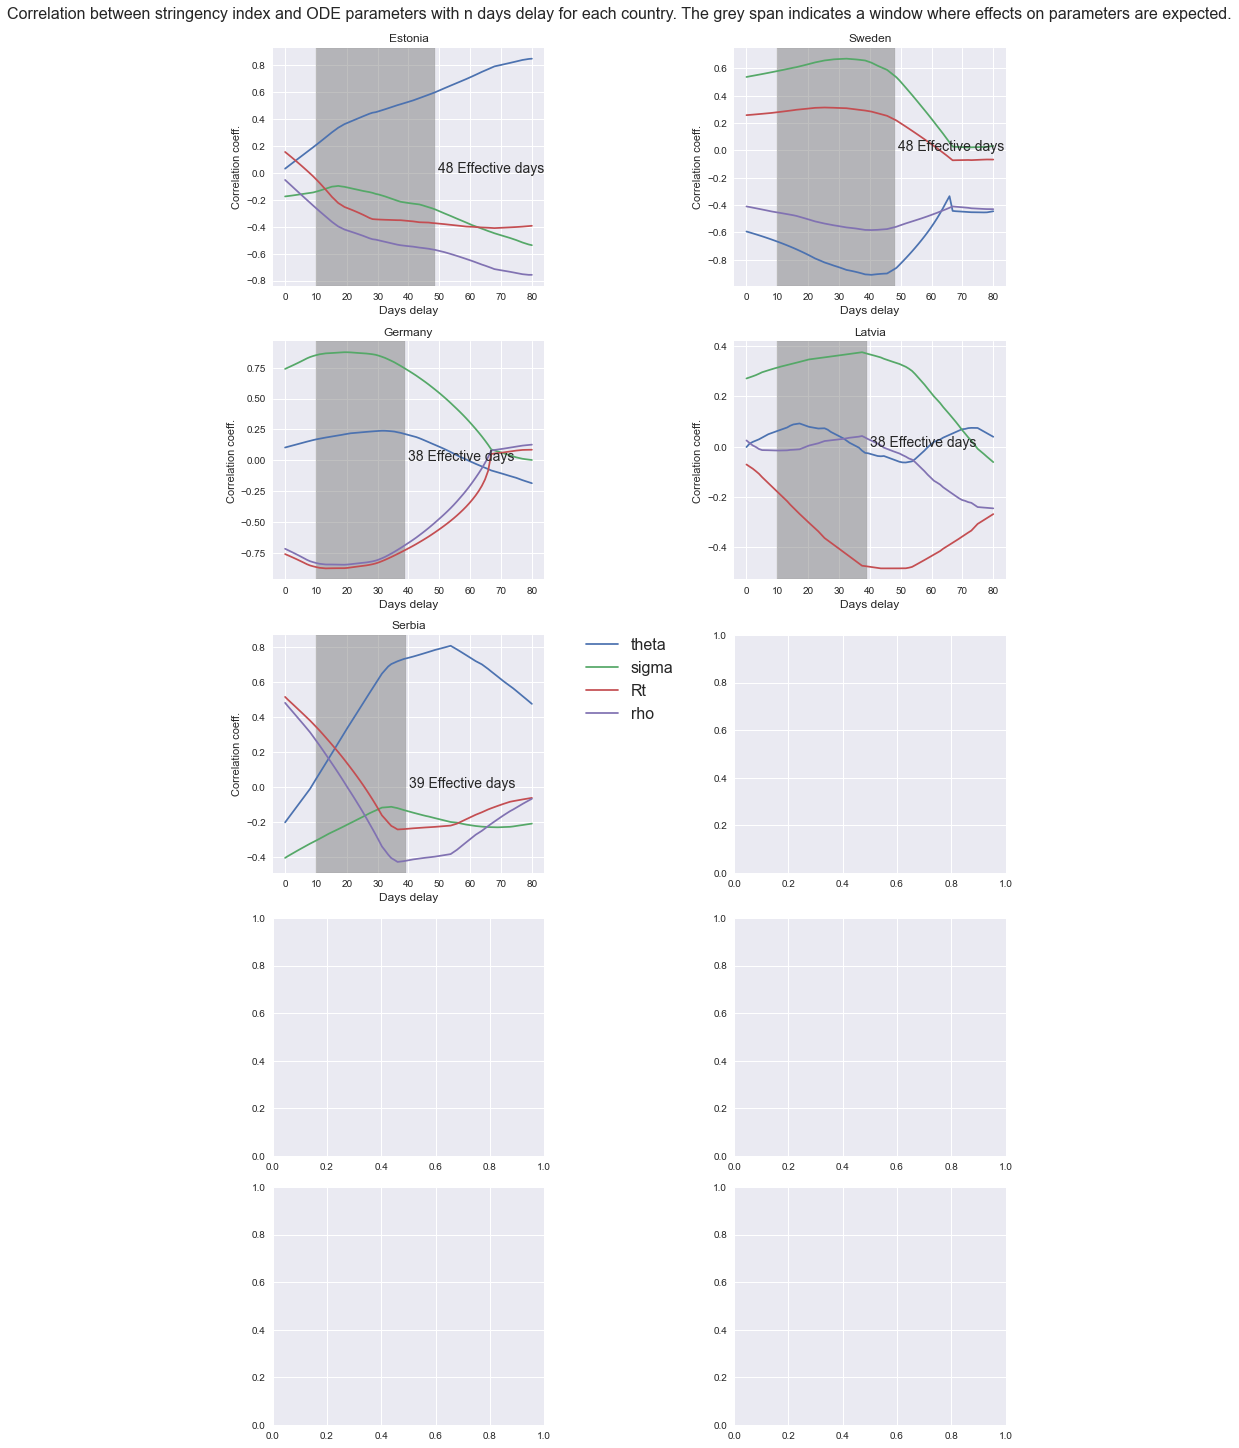

In [41]:
df_subset = df.copy()


def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

# Max number of days to delay effect
max_delay_days = 80
incubation_period = 10

meds = []
countries = df_subset["Country"].unique()
variables = ["theta", "sigma", "Rt", "rho"] # Excluded kappa
nrow, ncol = 5, 2
colors = map('C{}'.format, cycle(range(nrow*ncol)))
fig, axs = plt.subplots(nrow,ncol,figsize=(ncol*5.5, nrow*4), constrained_layout=True);
fig.suptitle("Correlation between stringency index and ODE parameters with n days delay for each country. \
The grey span indicates a window where effects on parameters are expected.", fontsize=16)
df[variables] = df[variables].astype(float)

for country, ax in zip(countries, axs.flatten()):
    for var in variables:
        df_country = df_subset[df_subset["Country"] == country] 
        display(df_country)
        # Calculate mean of the given parameter for each day
        grouped = df_country.groupby("Date", as_index=False).mean()


        # Calculate correlation for several days of delay until max_delay is reached
        xcov_monthly = [crosscorr(grouped[var], grouped["Stringency_index"], lag=i) for i in range(max_delay_days)]

        # Variables theta, sigma and kappa are expected to increase, whereas
        # Rt and rho are expected to decrease after policy measures are taken
        if var == "theta" or var == "sigma" or var == "kappa":
            meds.append(np.argmax(xcov_monthly[:60]))
        else:
            meds.append(np.argmin(xcov_monthly[:60]))
        
        ax.plot(np.linspace(0, max_delay_days, num=max_delay_days), xcov_monthly);
        ax.set_xlabel("Days delay", fontsize=12)
        ax.set_ylabel("Correlation coeff.")
        ax.set_title(country)
    ax.text(np.mean(meds) + 1, 0, str(int(np.mean(meds))) + " Effective days")
    ax.axvspan(incubation_period, np.mean(meds), alpha=0.5, color='grey')
    
ax.legend(variables, bbox_to_anchor=(1.1, 1.05), fontsize=16)
plt.show()


In [ ]:
import numpy as np
import ruptures as rpt
import seaborn as sns
sns.set()

# Dataset preparation
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu()
population_data = data_loader.population()
# Scenario analysis
snl = cs.Scenario(jhu_data, population_data, "Sweden")
snl.trend(show_figure=True)
snl.estimate(cs.SIRF)

hist = snl.history("Rt", show_figure=False);

Text(0.5, 30.5, 'Days')

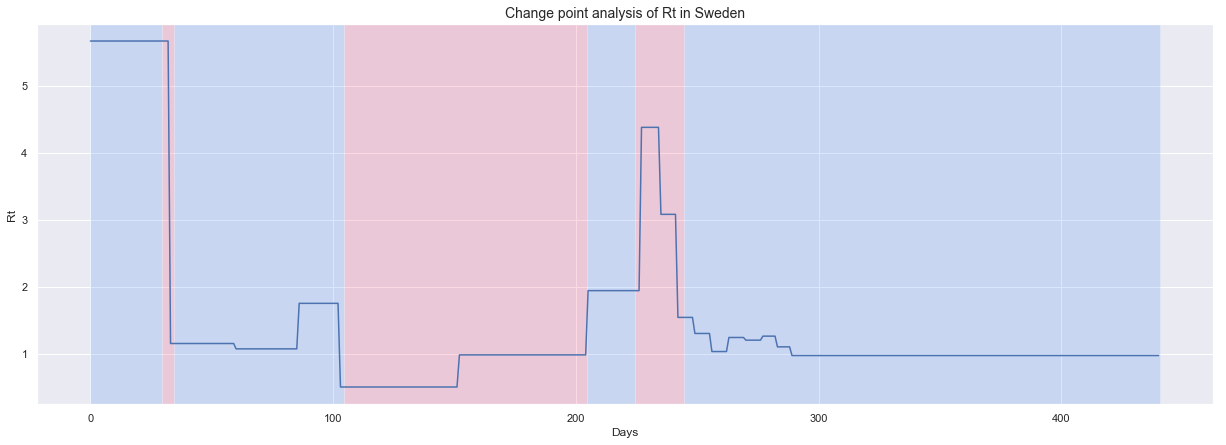

In [49]:
# Changepoint detection
model = "l2"  # Binary Segmentation search method
algo = rpt.Binseg(model=model).fit(hist.reset_index()["Main"].values)
my_bkps = algo.predict(n_bkps=6)
fig, ax = rpt.show.display(hist.reset_index()["Main"].values, my_bkps, figsize=(17, 6));
ax[0].set_title("Change point analysis of Rt in Sweden", fontsize=14)
ax[0].set_ylabel("Rt")
ax[0].set_xlabel("Days")

In [122]:
track_df.to_pickle("figures/pickles/df_14_countries.p")

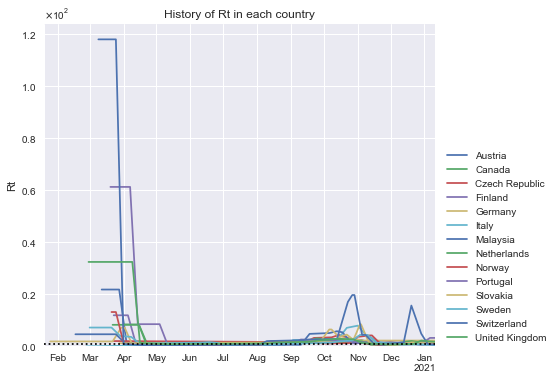

Country,Austria,Canada,Czech Republic,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,Slovakia,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
rt = analyser.history("Rt", roll_window=7)


In [115]:
df.columns

Index(['Date', 'Country', 'theta', 'kappa', 'rho', 'sigma', 'alpha1 [-]',
       '1/alpha2 [day]', '1/beta [day]', '1/gamma [day]', 'Rt',
       'School_closing', 'Workplace_closing', 'Cancel_events',
       'Gatherings_restrictions', 'Transport_closing',
       'Stay_home_restrictions', 'Internal_movement_restrictions',
       'International_movement_restrictions', 'Information_campaigns',
       'Testing_policy', 'Contact_tracing', 'Stringency_index'],
      dtype='object')

In [112]:
long = rt.unstack()
long = pd.DataFrame(long)
long = long.reset_index()
long.columns=["Country", "Date", "Rt"]
long= long.dropna()
long

,Country,Date,Rt
53,Austria,2020-03-12,21.84
54,Austria,2020-03-13,21.84
55,Austria,2020-03-14,21.84
56,Austria,2020-03-15,21.84
57,Austria,2020-03-16,21.84
...,...,...,...
5021,United Kingdom,2021-01-07,1.78
5022,United Kingdom,2021-01-08,1.78
5023,United Kingdom,2021-01-09,1.78
5024,United Kingdom,2021-01-10,1.78


In [121]:
track_df

,Date,Country,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-03,Switzerland,117.92,0.034049,0.000302,0.047025,0.000083,0,0,2,1,0,0,0,0,2,2,1,25.00
1,2020-03-03,Switzerland,117.92,0.034049,0.000302,0.047025,0.000083,0,0,2,1,0,0,0,0,2,2,1,25.00
2,2020-03-03,Switzerland,117.92,0.034049,0.000302,0.047025,0.000083,0,0,2,1,0,0,0,0,2,2,1,25.00
3,2020-03-03,Switzerland,117.92,0.034049,0.000302,0.047025,0.000083,0,0,2,1,0,0,0,0,2,2,1,25.00
4,2020-03-03,Switzerland,117.92,0.034049,0.000302,0.047025,0.000083,0,0,2,1,0,0,0,0,2,2,1,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55658,2021-01-10,Canada,0.87,0.003232,0.000309,0.022474,0.025305,3,2,0,3,0,1,0,3,2,3,1,64.35
55659,2021-01-10,Canada,0.87,0.003232,0.000309,0.022474,0.025305,3,2,0,3,0,1,0,3,2,3,1,64.35
55660,2021-01-10,Canada,0.87,0.003232,0.000309,0.022474,0.025305,3,2,0,3,0,1,0,3,2,3,1,64.35
55661,2021-01-10,Canada,0.87,0.003232,0.000309,0.022474,0.025305,3,2,0,3,0,1,0,3,2,3,1,64.35


In [ ]:
def change_point_detection(corr_list, country, model="l2", default_days=14, breaks=6):
    """
        Calculate the windows of 
        Models: "l2",  "l1", "rbf", "linear", "normal", "ar"
    """
    
    corr = pd.DataFrame(corr_list)
    algo = rpt.Binseg(model=model).fit(corr)
    bkps = algo.predict(n_bkps=breaks)
    
    window = corr_list[bkps[0]:bkps[1]]
    
    # Get location of LOWEST correlation value (= strongest negative correlation)
    delay_days = np.argmin(window) + bkps[0]
    color = "blue"
    if bkps[0] >= 30:
        print("Delay not found, delay set to 14")
        delay_days = default_days
        color = "red"
        
    fig, ax = rpt.show.display(corr, bkps);
    ax[0].set_title("Change point analysis of Rt in " + country + " ," + str(delay_days), fontsize=14)
    ax[0].set_ylabel("Rt")
    ax[0].set_xlabel("Days")
    ax[0].axvline(delay_days, color=color)
    
    return delay_days



In [169]:
data_loader = cs.DataLoader(directory="kaggle/input")
jhu_data = data_loader.jhu()
population_data = data_loader.population()
oxcgrt_data = data_loader.oxcgrt()

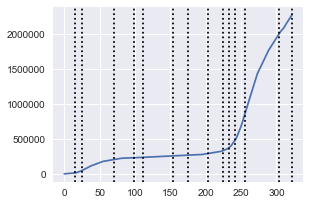

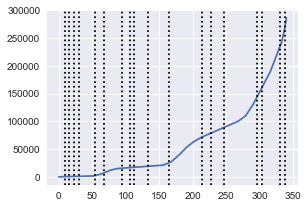

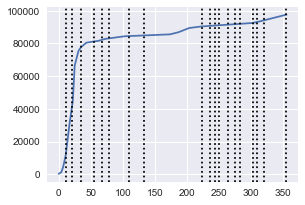

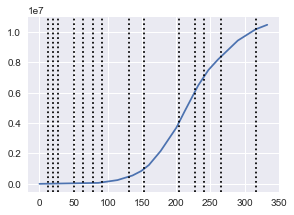

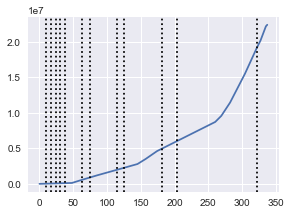

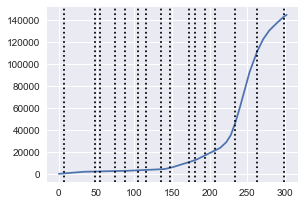

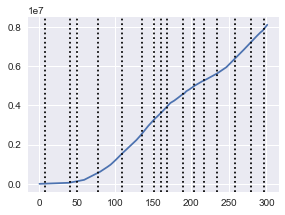

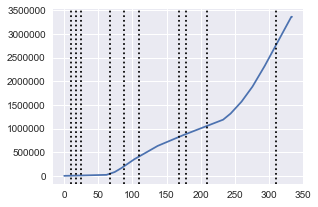

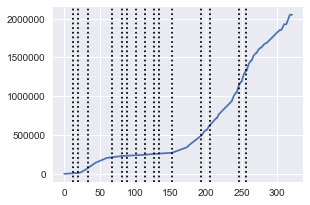

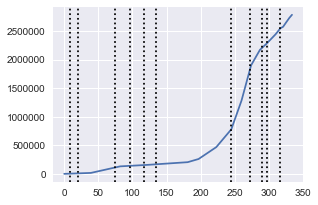

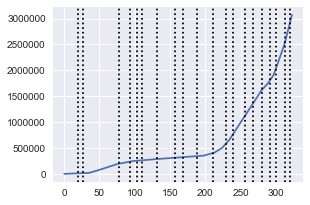

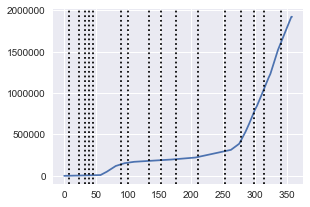

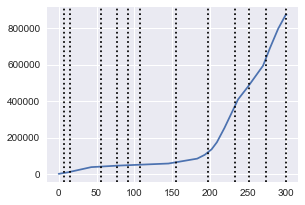

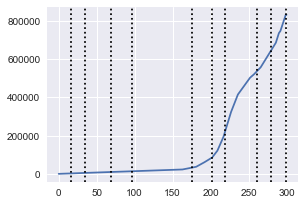

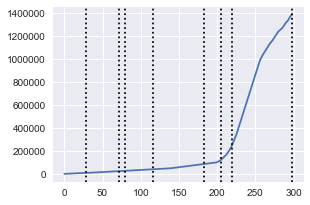

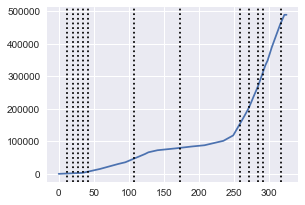

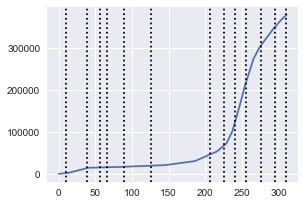

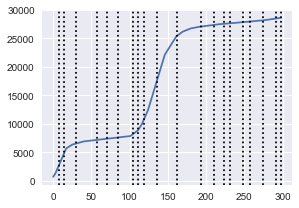

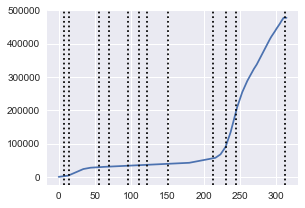

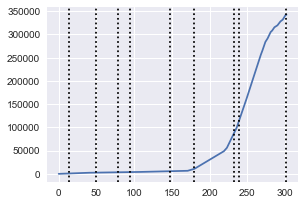

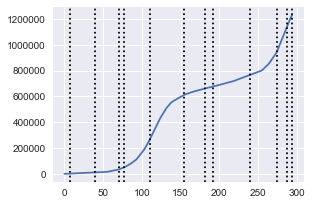

                Measures_Delay
Country                       
Italy                21.583333
Japan                15.400000
China                14.882353
India                18.272727
USA                  19.500000
Greece               17.857143
Brazil               18.285714
Russia               25.000000
Spain                15.538462
France               22.222222
United Kingdom       13.888889
Germany              20.571429
Netherlands          24.600000
Czech Republic       25.500000
Poland               31.833333
Sweden               22.000000
Austria              19.909091
Australia            14.444444
Switzerland          23.700000
Hungary              32.285714
South Africa         24.000000


In [279]:
measures_delay = pd.DataFrame(columns=["Country", "Measures_Delay"])
measures_delay.set_index("Country", inplace=True)

plt.rcParams['figure.figsize'] = 4, 3


countries = ["Italy", "Japan", "China", "India", "USA",
                          "Greece", "Brazil", "Russia", "Spain", "France",
                          "United Kingdom", "Germany", "Netherlands", "Czech Republic",
                          "Poland", "Sweden", "Austria", "Australia",
                          "Switzerland", "Hungary", "South Africa"]

# countries = ["Greece"]


for country in countries:
    
    scn = cs.Scenario(jhu_data, population_data, country)
    records = scn.records(show_figure=False,
                                        variables=["Confirmed", "Infected",
                                                  "Fatal", "Recovered"])
    records["Confirmed_diff"] = records["Confirmed"].diff()
    records.replace(0, np.nan, inplace=True)
    records.fillna(method="bfill", inplace=True)
    records.fillna(method="ffill", inplace=True)

    oxcgrt_df = oxcgrt_data.subset(country=country).set_index("Date")
    records = records.set_index("Date")
    records["Stringency_index"] = oxcgrt_df["Stringency_index"]
    
    df = records.pivot_table(index="Confirmed", values="Stringency_index")
    df_run = df.copy()

    # Convert index to serial numbers
    serial_df = pd.DataFrame(np.arange(1, df_run.index.max() + 1, 1))
    serial_df.index += 1
    df_run = df_run.join(serial_df, how="outer")
    series = df_run.reset_index(drop=True).iloc[:, 0]
    series = series.dropna()

    records = records.reset_index()
    
    
    # Convert index values to Susceptible values
    reset_series = series.reset_index(drop=True)
    reset_series.index += 1
    reset_series
    
    # Detection with Ruptures
    algorithm = rpt.Pelt(model="rbf", jump=1, min_size=7)
    results = algorithm.fit_predict(series.values, pen=0.5)

    new_confirmed_df = reset_series[results].reset_index()
    new_confirmed_df = new_confirmed_df.interpolate(method="linear").dropna().astype(np.float64)
    
    # Convert new_confirmed values to dates
    df = pd.merge_asof(
        new_confirmed_df.sort_values("Stringency_index"),
        df.reset_index().sort_values("Stringency_index"),
        on="Stringency_index", direction="nearest"
    )
    # Show plot of selected windows
    plt.plot(range(len(records)), records["Confirmed"])
    for day in results:
        plt.axvline(day, color="black", linestyle=":")
    plt.show()
    
    df["periods"] = df["index"].sort_values(ignore_index=True)
    df["periods"] = df["periods"].diff()
    
    q_low = df["periods"].quantile(0.01)
    q_hi  = df["periods"].quantile(0.99)

    df_filtered = df[(df["periods"] < q_hi)]

    measures_delay.loc[country] = df_filtered["periods"].mean()
    
    corr_countries = {}
    param = "Confirmed"
    grouped = records
    max_delay_days = len(records) - 1

    # Calculate increase or decrease in Rt for each day
    grouped = grouped.reset_index()
    grouped[param + "_change"] = grouped[param].diff(1)

    # Calculate correlation for several days of delay until max_delay is reached
    corr_list = [crosscorr(grouped[param], grouped["Stringency_index"], lag=i) for i in range(0, max_delay_days)]

    # Append to dict for later use
    corr_countries[country] = corr_list

#     change_point_detection(corr_list, country, model="l2", breaks=len(results))

print(measures_delay)

In [276]:
measures_delay

,Measures_Delay
Country,
Italy,21.583333
Japan,15.400000
China,14.882353
India,18.272727
USA,19.500000
Greece,17.857143
Brazil,18.285714
Russia,25.000000
Spain,15.538462
